# The Bootstrap

## 13.2.1. Employee Compensation in the City of San Francisco
SF OpenData is a website where the City and County of San Francisco make some of their data publicly available. One of the data sets contains compensation data for employees of the City. These include medical professionals at City-run hospitals, police officers, fire fighters, transportation workers, elected officials, and all other employees of the City.

Compensation data for the calendar year 2019 are in the table sf2019.

[san_francisco_2019.csv](https://github.com/data-8/textbook/blob/main/assets/data/san_francisco_2019.csv)

In [1]:
import pandas 
from numba import jit
import numpy as np

In [2]:
sf2019 = pandas.read_csv('san_francisco_2019.csv')

In [3]:
sf2019.head()

,Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
0,Public Protection,Adult Probation,Information Systems,IS Trainer-Journey,91332.0,0.0,40059.0,131391.0
1,Public Protection,Adult Probation,Information Systems,IS Engineer-Assistant,123241.0,0.0,49279.0,172520.0
2,Public Protection,Adult Probation,Information Systems,IS Business Analyst-Senior,115715.0,0.0,46752.0,162468.0
3,Public Protection,Adult Probation,Information Systems,IS Business Analyst-Principal,159394.0,0.0,57312.0,216706.0
4,Public Protection,Adult Probation,Information Systems,IS Programmer Analyst,70035.0,0.0,28671.0,98706.0


In [ ]:
sf2019.where('Job','Mayor')

In [5]:
sf2019.sort_values('Total Compensation')

,Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
18526,"Public Works, Transportation & Commerce",Municipal Transportation Agcy,"Clerical, Secretarial & Steno",Senior Clerk Typist,0.0,0.0,0.0,0.0
43234,General Administration & Finance,Human Resources,Public Service Aide,Public Service Trainee,0.0,0.0,0.0,0.0
22329,"Public Works, Transportation & Commerce",Public Utilities Commission,"Clerical, Secretarial & Steno",Senior Clerk,0.0,0.0,0.0,0.0
32865,Community Health,Public Health,Public Service Aide,PS Aide Health Services,0.0,0.0,0.0,0.0
38732,Culture & Recreation,Recreation And Park Commission,Recreation,Pool Lifeguard,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
43939,General Administration & Finance,Retirement Services,Unassigned,Managing Director,449378.0,0.0,120857.0,570235.0
43940,General Administration & Finance,Retirement Services,Unassigned,Managing Director,451507.0,0.0,120276.0,571784.0
43938,General Administration & Finance,Retirement Services,Unassigned,Managing Director,482649.0,0.0,134905.0,617554.0
43937,General Administration & Finance,Retirement Services,Unassigned,Managing Director,483072.0,0.0,134879.0,617951.0


array([[<AxesSubplot:title={'center':'Salary'}>,
        <AxesSubplot:title={'center':'Overtime'}>],
       [<AxesSubplot:title={'center':'Benefits'}>,
        <AxesSubplot:title={'center':'Total Compensation'}>]],
      dtype=object)

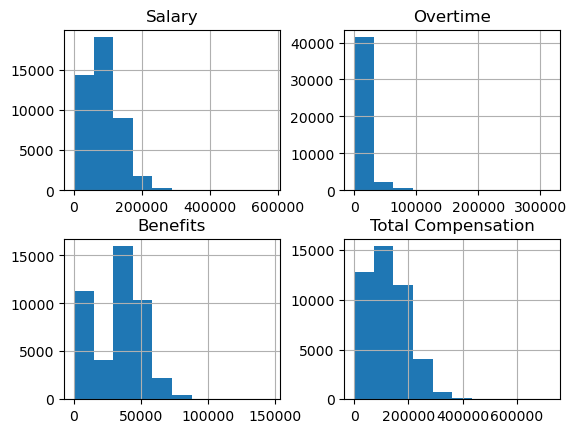

In [11]:
sf2019.hist()

In [33]:
population_median =  np.percentile(sf2019['Total Compensation'],50)
population_median

121630.0

<AxesSubplot:>

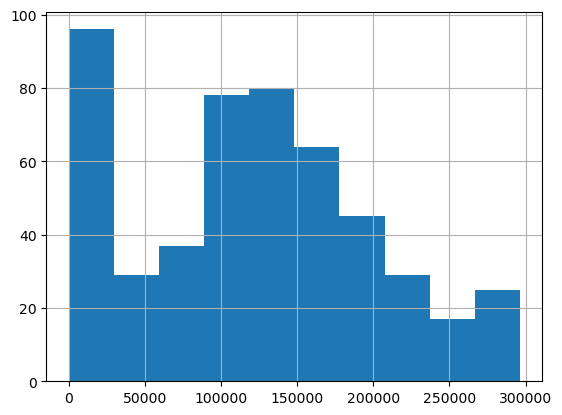

In [35]:
our_sample = sf2019.sample(500, replace=False)
our_sample['Total Compensation'].hist()

In [36]:
est_median = np.percentile(our_sample['Total Compensation'],q=50)
est_median

122208.0

The sample size is large. By the law of averages, the distribution of the sample resembles that of the population. Consequently the sample median is quite comparable to the population median, though of course it is not exactly the same.

So now we have one estimate of the parameter. But had the sample come out differently, the estimate would have had a different value. We would like to be able to quantify the amount by which the estimate could vary across samples. That measure of variability will help us measure how accurately we can estimate the parameter.

To see how different the estimate would be if the sample had come out differently, we could just draw another sample from the population. But that would be cheating. We are trying to mimic real life, in which we won’t have all the population data at hand.

Somehow, we have to get another random sample without sampling again from the population.

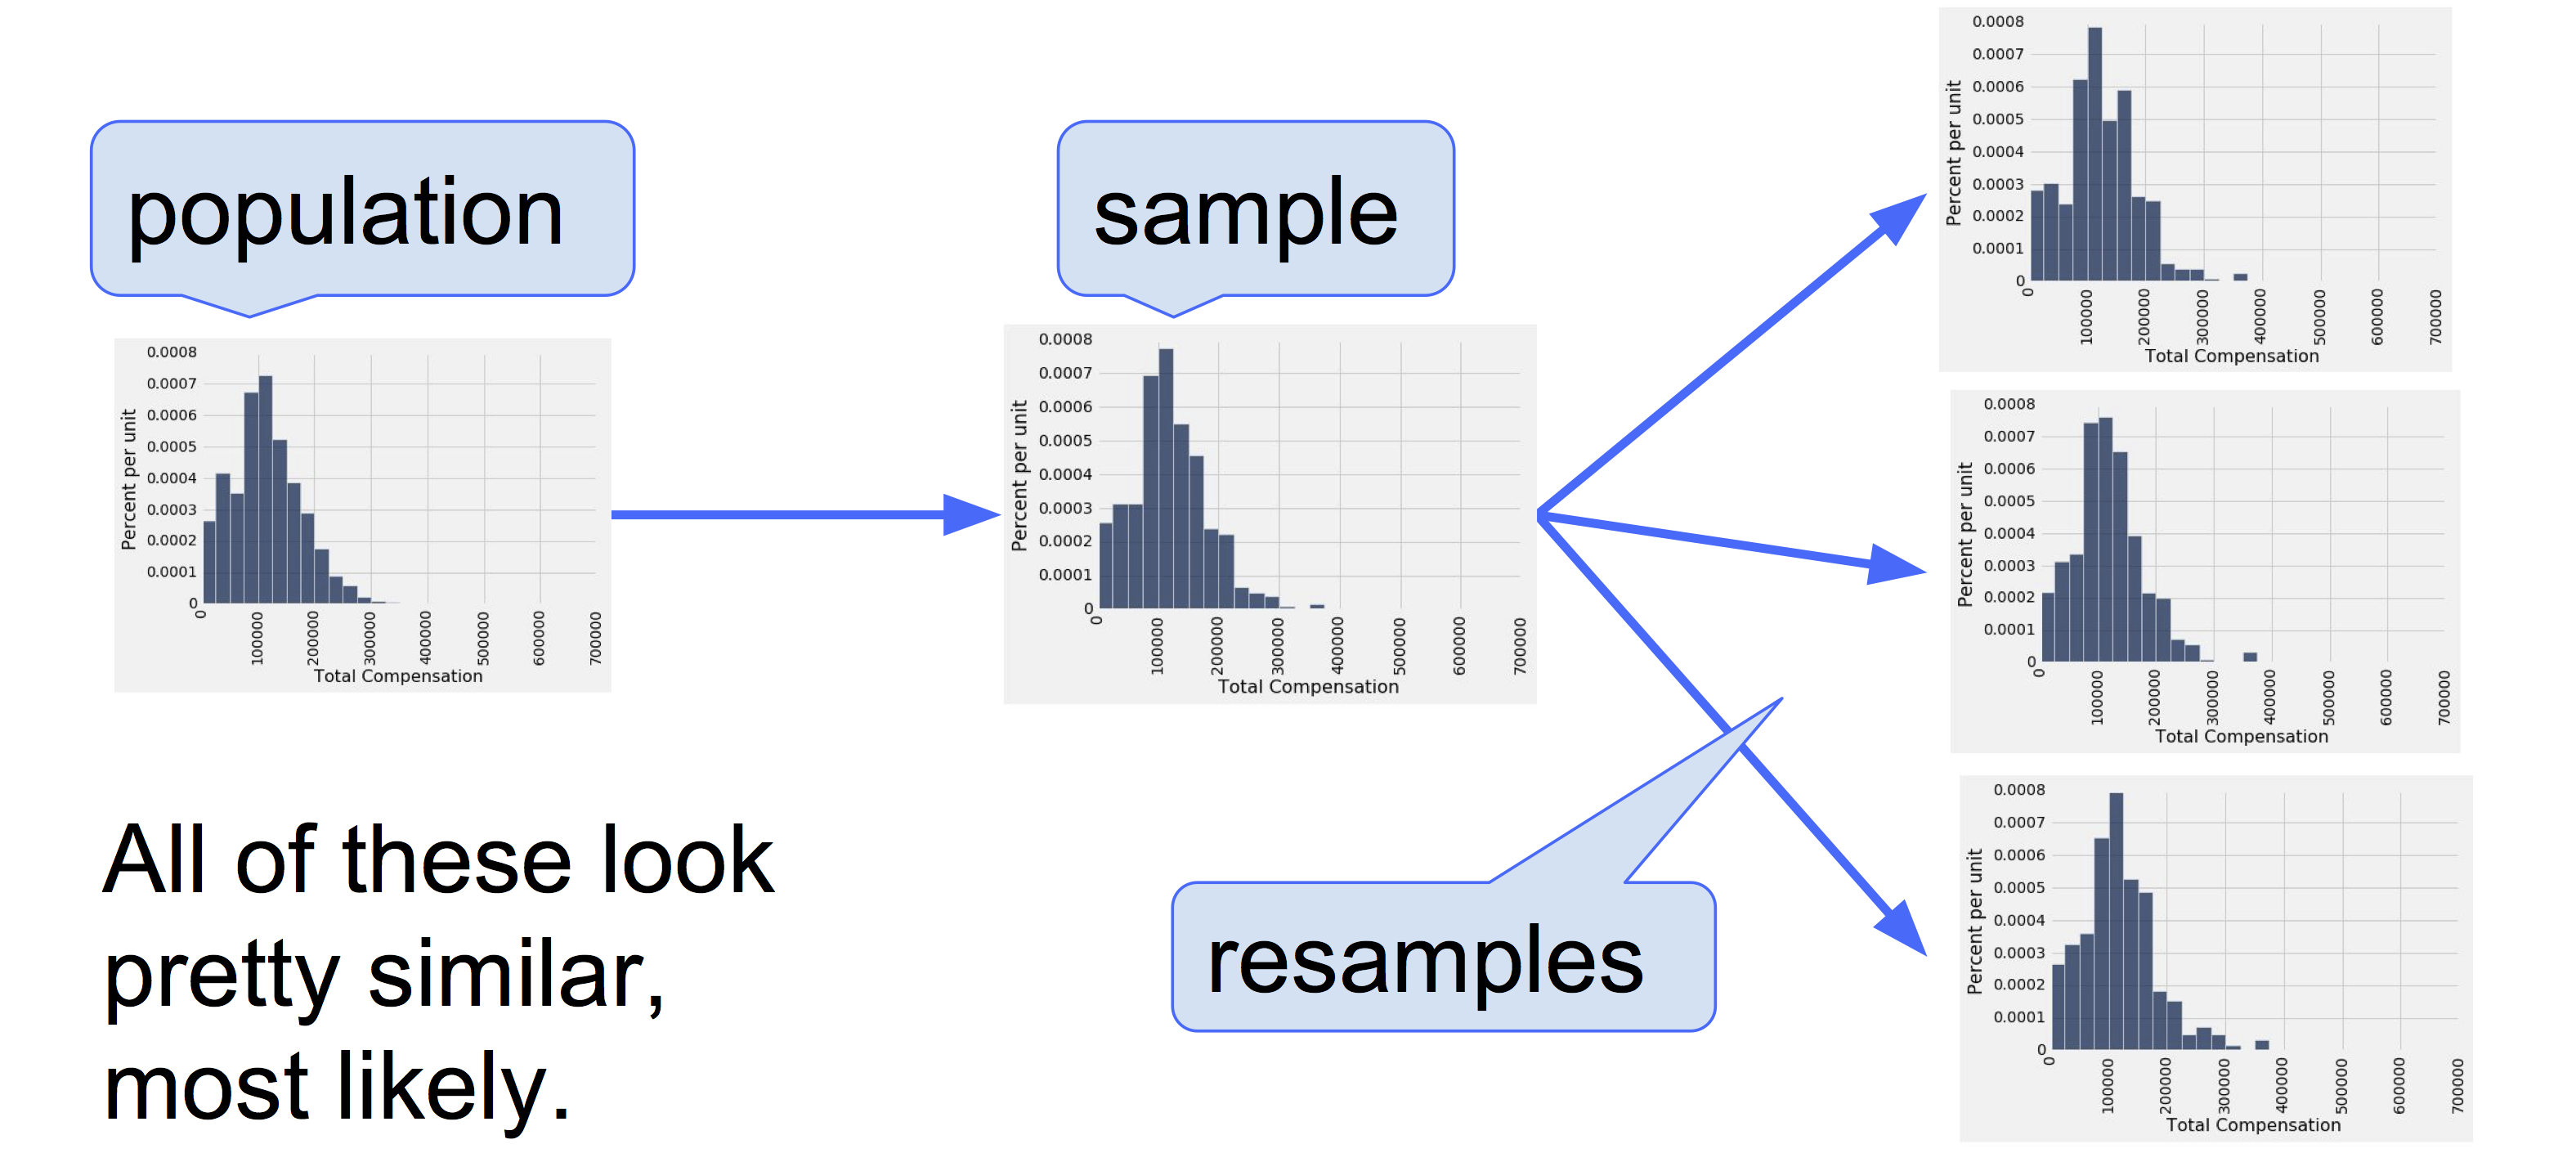

In [61]:

def one_bootstrap_median(our_sample:pandas.DataFrame):
    resampled_table = our_sample.sample(n=len(our_sample),replace=True)
    bootstrapped_median = np.percentile(resampled_table['Total Compensation'],q=50)
    return bootstrapped_median

In [62]:
one_bootstrap_median(our_sample)

122649.0

In [63]:

def get_bootstrap(our_sample,sampling_func):
    num_repetitions = 5000
    bootstrap_medians = np.zeros(num_repetitions, dtype=np.float64)
    for i in np.arange(num_repetitions):
        bootstrap_medians[i] = sampling_func(our_sample)
    return bootstrap_medians

In [64]:
bootstraped = get_bootstrap(our_sample, one_bootstrap_median)
bootstraped

array([125474., 129666., 118469., ..., 129240., 128721., 122649.])

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

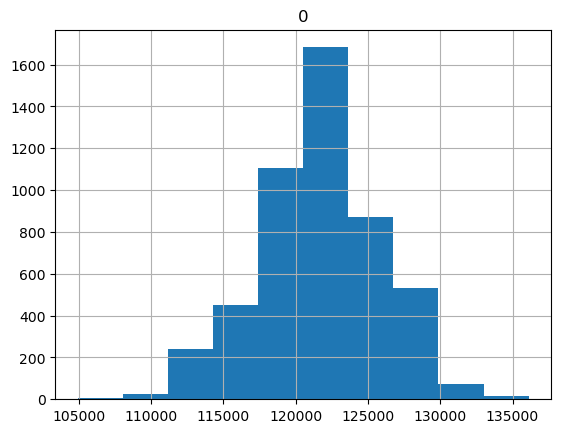

In [65]:
bootstraped_sheet = pandas.DataFrame(bootstraped)
bootstraped_sheet.hist()

In [69]:
interval = (np.percentile(bootstraped,2.5),np.percentile(bootstraped,97.5))
interval

(113253.5, 129714.5)

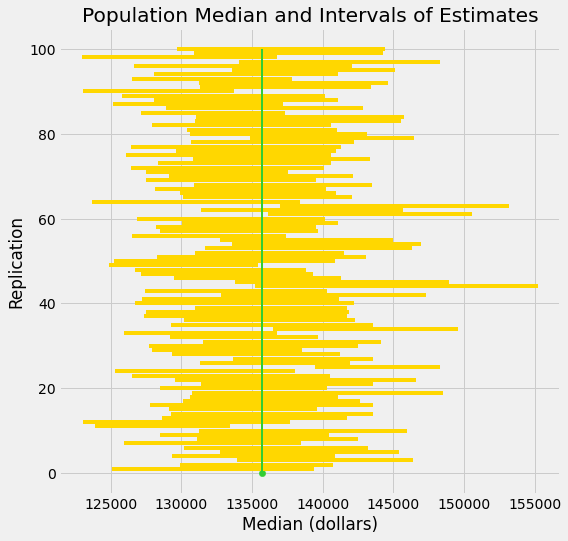